Submitted by: Fawad Kirmani

Last Modified: 09/25/2021

GitHub Link: https://github.com/fkirmani/csce590-001/tree/main/Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
input_data = pd.read_csv('./data/data_source_WIN_21FLPDEM.txt', delimiter="\t", 
                         low_memory=False)  
input_data.head()

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,...,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,ChlaC_ugl,"Chlorophyll a, corrected for pheophytin",Total,4.3,ug/l,NaN,NaN,4.30,mg/m3
1,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,chlb_ugl,Chlorophyll b,Total,0.5,ug/l,U,NaN,0.50,mg/m3
2,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,chlc_ugl,Chlorophyll c,Total,0.5,ug/l,NaN,NaN,0.50,mg/m3
3,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,Ecoli_100ml,Escherichia coli,Total,821.0,cfu/100ml,NaN,NaN,821.00,MPN/100 mL
4,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,...,m,NH3_N_ugl,"Nitrogen, ammonia as N",Total,90.0,ug/l,NaN,NaN,0.09,mg/L


In [3]:
input_data_pivot = input_data.pivot_table(columns="Parameter", 
                       index=["SampleDate", "ActivityDepth", "StationID", "Result_Comment"], 
                       values="Result_Value").reset_index()
input_data_pivot

Parameter,SampleDate,ActivityDepth,StationID,Result_Comment,Alk_CaCO3_mgl,BOD5_mgl,ChlaC_ugl,Chla_ugl,Color_true_pcu,Cond_umhocm,...,TKN_ugl,TN_ugl,TP_ugl,TSI,TSS_mgl,TempW_C,Turb_ntu,chlb_ugl,chlc_ugl,pH
0,1/19/2021 10:16:00 AM,0.300,"=""25-02""",Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/19/2021 10:57:00 AM,0.297,"=""24-02""",Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/19/2021 11:32:00 AM,0.355,"=""39-01""",Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/19/2021 12:01:00 PM,0.355,"=""39-05""",Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/19/2021 12:03:00 PM,0.202,"=""22-01""",Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,9/9/2019 9:57:00 AM,0.200,"=""01-35""",Sample fraction omitted per WIN guidelines,NaN,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN,NaN
11644,9/9/2019 9:57:00 AM,0.200,"=""01-35""",Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,650.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN
11645,9/9/2019 9:57:00 AM,0.198,"=""01-35""",no visible particles,NaN,NaN,NaN,NaN,NaN,15719.0,...,NaN,NaN,NaN,NaN,NaN,31.10,NaN,NaN,NaN,7.93
11646,9/9/2019 9:58:00 AM,0.939,"=""01-35""",no visible particles,NaN,NaN,NaN,NaN,NaN,21035.0,...,NaN,NaN,NaN,NaN,NaN,31.48,NaN,NaN,NaN,7.83


In [4]:
input_data_pivot.rename(columns={'Sucralose_ug/l':'Sucralose_ugl'}, inplace=True)

In [5]:
input_data_pivot_algal = input_data_pivot[input_data_pivot['Result_Comment'].str.contains('algal')]

In [6]:
input_data_pivot_algal.shape

(136, 31)

summarizing statistics of input_data_pivot dataframe

In [7]:
summary = input_data_pivot_algal.describe()
print(summary.columns)
summary

Index(['ActivityDepth', 'Alk_CaCO3_mgl', 'BOD5_mgl', 'ChlaC_ugl', 'Chla_ugl',
       'Color_true_pcu', 'Cond_umhocm', 'DO_mgl', 'DO_percent',
       'Ecoccus_100ml', 'Ecoli_100ml', 'NH3_N_ugl', 'NOx_ugl', 'OP_mgl',
       'Pheo_ugl', 'Salinity_PSS', 'Salinity_ppt', 'Secchi_m', 'TKN_ugl',
       'TN_ugl', 'TP_ugl', 'TSI', 'TSS_mgl', 'TempW_C', 'Turb_ntu', 'chlb_ugl',
       'chlc_ugl', 'pH'],
      dtype='object', name='Parameter')


Parameter,ActivityDepth,Alk_CaCO3_mgl,BOD5_mgl,ChlaC_ugl,Chla_ugl,Color_true_pcu,Cond_umhocm,DO_mgl,DO_percent,Ecoccus_100ml,...,TKN_ugl,TN_ugl,TP_ugl,TSI,TSS_mgl,TempW_C,Turb_ntu,chlb_ugl,chlc_ugl,pH
count,136.000000,0.0,0.0,0.0,0.0,0.0,135.000000,135.000000,135.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,136.000000,0.0,0.0,0.0,135.000000
mean,0.812029,NaN,NaN,NaN,NaN,NaN,35799.621481,6.869259,96.606667,NaN,...,NaN,NaN,NaN,NaN,NaN,28.506651,NaN,NaN,NaN,7.994370
std,0.845282,NaN,NaN,NaN,NaN,NaN,14589.287251,2.439833,33.793729,NaN,...,NaN,NaN,NaN,NaN,NaN,3.162371,NaN,NaN,NaN,1.171359
min,0.110000,NaN,NaN,NaN,NaN,NaN,370.700000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,17.300000,NaN,NaN,NaN,5.960000
25%,0.201500,NaN,NaN,NaN,NaN,NaN,29074.500000,5.795000,79.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,25.807500,NaN,NaN,NaN,7.520000
50%,0.523500,NaN,NaN,NaN,NaN,NaN,37353.000000,7.190000,100.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,29.685000,NaN,NaN,NaN,8.050000
75%,1.051750,NaN,NaN,NaN,NaN,NaN,49885.500000,8.090000,116.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,31.200000,NaN,NaN,NaN,8.330000
max,4.105000,NaN,NaN,NaN,NaN,NaN,52371.800000,13.360000,196.700000,NaN,...,NaN,NaN,NaN,NaN,NaN,33.800000,NaN,NaN,NaN,12.970000


Not every parameter is measured on every date the survey of water is conducted.

In [8]:
input_data_algal_no_null_columns = input_data_pivot_algal.dropna(axis=1, how='all')
input_data_algal_no_null_columns

Parameter,SampleDate,ActivityDepth,StationID,Result_Comment,Cond_umhocm,DO_mgl,DO_percent,Salinity_PSS,Salinity_ppt,TempW_C,pH
427,1/30/2020 1:53:00 PM,0.198,"=""35-04""","dense algae, leaf debris transport, tannic, no...",809.4,9.19,95.9,0.40,0.40,17.3000,7.71
428,1/30/2020 1:54:00 PM,0.661,"=""35-04""","dense algae, leaf debris transport, tannic, no...",808.0,9.97,104.2,0.40,0.40,17.3000,7.71
616,10/15/2019 10:55:00 AM,0.213,"=""E4""","red brown color, suspect algal bloom, detritus...",29362.6,4.20,58.4,18.10,18.10,27.0556,7.37
617,10/15/2019 10:56:00 AM,0.468,"=""E4""","red brown color, suspect algal bloom, detritus...",29373.3,4.41,61.3,18.11,18.11,27.0556,7.37
646,10/15/2019 12:45:00 PM,0.213,"=""E3""","red brown color, suspect algal bloom, mangrove...",27949.4,5.81,81.8,17.13,17.13,28.1667,7.57
...,...,...,...,...,...,...,...,...,...,...,...
10691,9/19/2018 10:04:00 AM,0.200,"=""35-04""","tannic green color and particle film, white fo...",502.0,4.84,62.3,0.24,0.24,28.3300,7.36
10692,9/19/2018 10:05:00 AM,0.565,"=""35-04""","tannic green color and particle film, white fo...",503.0,4.87,62.7,0.24,0.24,28.3600,7.36
11547,9/6/2018 12:12:00 PM,0.200,"=""E2""","tannic green color, algal bloom, seagrass debr...",42660.0,6.80,103.1,27.39,27.39,29.2900,8.33
11551,9/6/2018 12:13:00 PM,0.502,"=""E2""","tannic green color, algal bloom, seagrass debr...",26562.0,7.01,100.6,16.17,16.17,29.6700,8.27


#### creating labels for algal bloom

In [9]:
input_data_algal_no_null_columns["StationID"].unique()

array(['="35-04"', '="E4"', '="E3"', '="W6"', '="E1"', '="W7"', '="W3"',
       '="W5"', '="29-11"', '="E2"', '="SB"', '="RB"', '="23-08"',
       '="E5"', '="W8"', '="14-02"', '="24-02"', '="W2"'], dtype=object)

In [10]:
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("no evidence of algal bloom"),'label1'] = 0
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("no visible algal bloom"),'label1'] = 0
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("no visible particle film"),'label1'] = 0
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("suspected algal bloom"),'label1'] = 1
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("suspect algal bloom"),'label1'] = 1
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("suspect pyrodinium algal bloom"),'label1'] = 1
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains(", algal bloom,"),'label1'] = 1
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("algal epiphytes"),'label1'] = 1
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("evidence of algal bloom"),'label1'] = 2
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("algal bloom evidence"),'label1'] = 2
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("dense algae"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("algae detritus"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("heavy algal epiphytes"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("decayed algal debris"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("brown green algal colonies"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("red tide algal bloom"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("thick algal growth"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("suspect increased algal bloom"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("suspect increased algal productivity"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("algal debris"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("algal bloom complaint"),'label1'] = 3
input_data_algal_no_null_columns.loc[input_data_algal_no_null_columns['Result_Comment'].str.contains("thic algal lining"),'label1'] = 3

/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
input_data_algal_no_null_columns[input_data_algal_no_null_columns['label1'].isnull()]

Parameter,SampleDate,ActivityDepth,StationID,Result_Comment,Cond_umhocm,DO_mgl,DO_percent,Salinity_PSS,Salinity_ppt,TempW_C,pH,label1


Percentage of missing values in each parameter

In [12]:
for i in range(len(input_data_algal_no_null_columns.columns)):
    missing_data = input_data_algal_no_null_columns[input_data_algal_no_null_columns.columns[i]].isna().sum()
    perc = missing_data / len(input_data_algal_no_null_columns) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 1, percentage 0.74
>5,  missing entries: 1, percentage 0.74
>6,  missing entries: 1, percentage 0.74
>7,  missing entries: 2, percentage 1.47
>8,  missing entries: 2, percentage 1.47
>9,  missing entries: 0, percentage 0.00
>10,  missing entries: 1, percentage 0.74
>11,  missing entries: 0, percentage 0.00


Heatmap of missing values in each parameter/column

<AxesSubplot:xlabel='Parameter'>

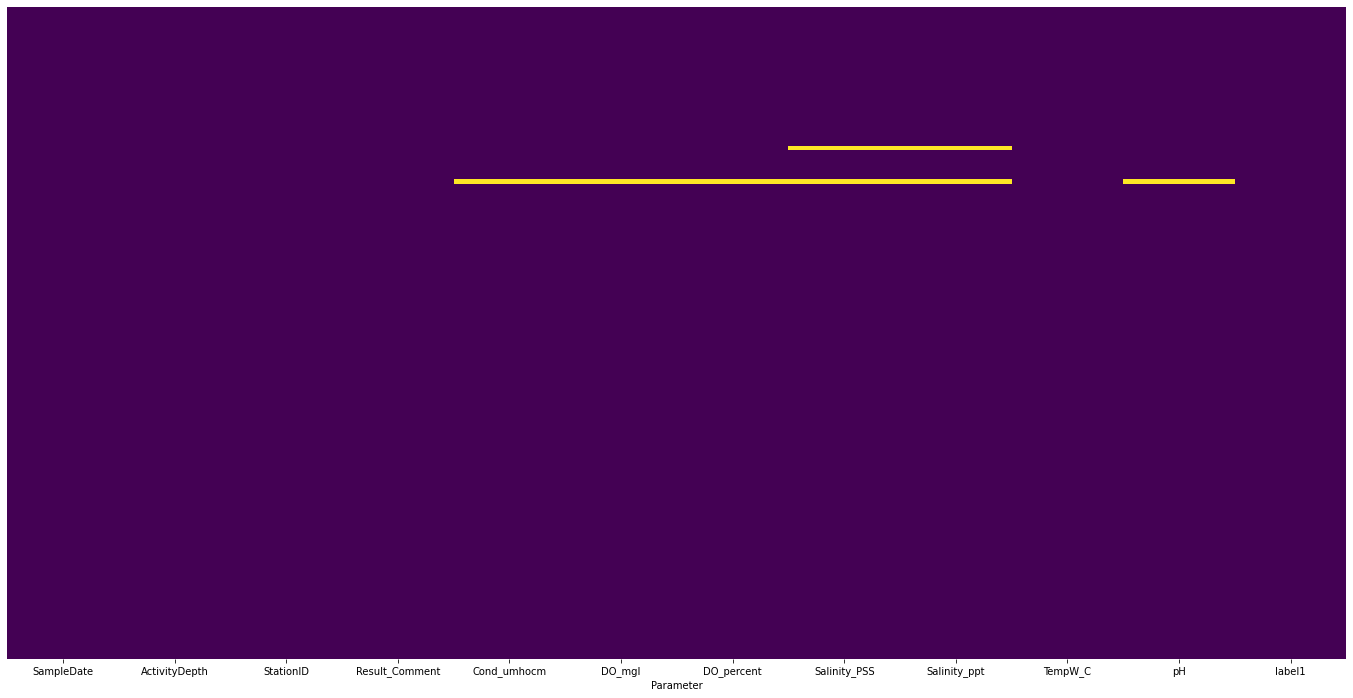

In [13]:
plt.rcParams["figure.figsize"] = [24, 12]
sns.heatmap(input_data_algal_no_null_columns.isna(), cbar=False, cmap='viridis', yticklabels=False)

From above figure, we can observe there are lot of missing data in every column except "SampleDate" and "ActivityDepth" which have no missing value.

##### Correlation Heatmap

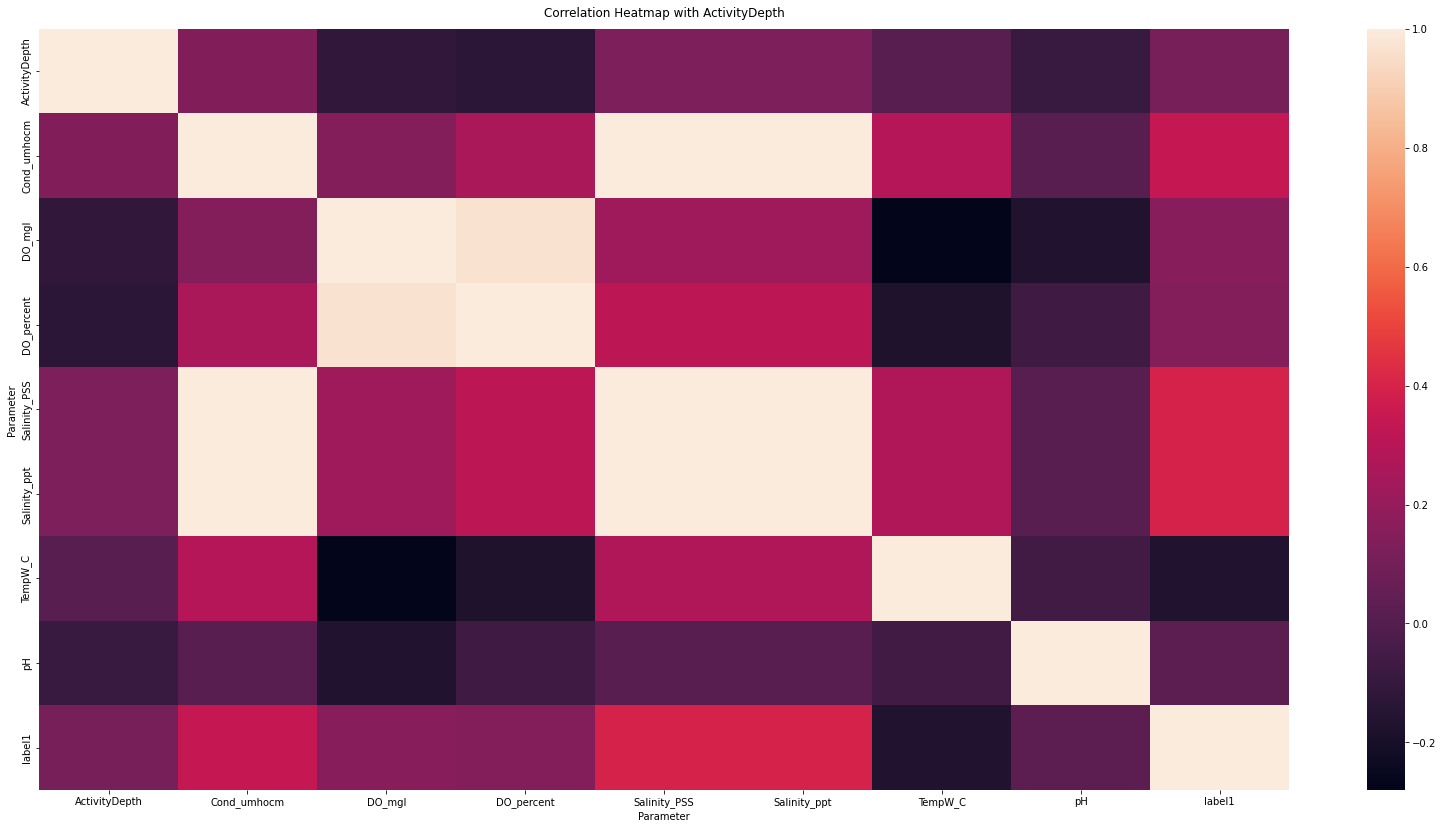

In [14]:
corr1 = input_data_algal_no_null_columns.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [28, 14]
heatmap = sns.heatmap(corr1)
heatmap.set_title('Correlation Heatmap with ActivityDepth', fontdict={'fontsize':12}, pad=12);

Two Highest correlation: One is self and other is with different feature. We are concenred with other features not same feature for correlation.

In [15]:
corr1.reset_index()
for i, col in enumerate(corr1.columns):
    try:
        top = pd.DataFrame(corr1[(corr1[col]>0.7) | (corr1[col]<-0.7)][col].nlargest(6).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

      Parameter  Cond_umhocm
1  Salinity_PSS     0.998979
2  Salinity_ppt     0.998979


    Parameter    DO_mgl
1  DO_percent  0.966415


  Parameter  DO_percent
1    DO_mgl    0.966415


      Parameter  Salinity_PSS
1  Salinity_ppt      1.000000
2   Cond_umhocm      0.998979


      Parameter  Salinity_ppt
0  Salinity_PSS      1.000000
2   Cond_umhocm      0.998979




Three highly correlated feature pairs are:

    1. Ecoli_100ml and Al_ugl
    2. Zn_ugl and Si_ugl
    3. DO_percent and Fe_diss_ugl

In [16]:
input_data_algal_imputed = input_data_algal_no_null_columns.drop(columns=['Result_Comment', 'SampleDate', 'StationID'])

# Imputing missing values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
for i in range(len(input_data_algal_imputed.columns)):
    input_data_algal_imputed[input_data_algal_imputed.columns[i]] = imputer.fit_transform(input_data_algal_imputed[input_data_algal_imputed.columns[i]].values.reshape(-1,1))[:,0]

input_data_algal_imputed

Parameter,ActivityDepth,Cond_umhocm,DO_mgl,DO_percent,Salinity_PSS,Salinity_ppt,TempW_C,pH,label1
427,0.198,809.4,9.19,95.9,0.40,0.40,17.3000,7.71,3.0
428,0.661,808.0,9.97,104.2,0.40,0.40,17.3000,7.71,3.0
616,0.213,29362.6,4.20,58.4,18.10,18.10,27.0556,7.37,1.0
617,0.468,29373.3,4.41,61.3,18.11,18.11,27.0556,7.37,1.0
646,0.213,27949.4,5.81,81.8,17.13,17.13,28.1667,7.57,1.0
...,...,...,...,...,...,...,...,...,...
10691,0.200,502.0,4.84,62.3,0.24,0.24,28.3300,7.36,3.0
10692,0.565,503.0,4.87,62.7,0.24,0.24,28.3600,7.36,3.0
11547,0.200,42660.0,6.80,103.1,27.39,27.39,29.2900,8.33,1.0
11551,0.502,26562.0,7.01,100.6,16.17,16.17,29.6700,8.27,1.0


In [17]:
import math as mt

import xgboost as xgb
from matplotlib import pyplot
from numpy import sort
from sklearn.feature_selection import SelectFromModel, f_classif
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

In [18]:
input_data_algal_imputed['label2'] = np.where(input_data_algal_imputed['label1']==0, 0, 1)
input_data_algal_imputed_label2 = input_data_algal_imputed.drop(columns=['label1'])
input_data_algal_imputed_label2.shape

(136, 9)

In [19]:
X_train = input_data_algal_imputed_label2.iloc[:,0:8]
y_train = input_data_algal_imputed_label2.iloc[:,8]
X_train = X_train.astype('float')
y_train = y_train.astype('int')

In [20]:
max_depth = [3]
learning_rate = [0.08]
n_estimators = [10]
# # silent = ['True']
# objective = ['binary:logistic']
# booster = ['gbtree']
# n_jobs = [-1]
# nthread = [4]
# gamma = [1]
# min_child_weight = [3]
# max_delta_step = [5]
# subsample = [0.5]
# colsample_bytree = [1]
# colsample_bylevel = [1]
# reg_alpha = [1]
# reg_lambda = [1]
# base_score = [0.1]
# random_state = [7777]
use_label_encoder = [False]
eval_metric = ['error']
# param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
#                   objective=objective, booster=booster, n_jobs=n_jobs, nthread=nthread, gamma=gamma,
#                   min_child_weight=min_child_weight, max_delta_step=max_delta_step, subsample=subsample,
#                   colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel, reg_alpha=reg_alpha,
#                   reg_lambda=reg_lambda, base_score=base_score, use_label_encoder = use_label_encoder,
#                   random_state=random_state)
param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
                  use_label_encoder = use_label_encoder, eval_metric=eval_metric)

In [21]:
from sklearn.metrics import make_scorer
auc_predict_score = make_scorer(roc_auc_score)

In [22]:
# # train model
model1 = XGBClassifier()
CV_xgb = GridSearchCV(estimator=model1, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb.fit(X_train, y_train)
# print(CV_rfc.best_params_)
CV_xgb.cv_results_

{'mean_fit_time': array([0.0470527]),
 'std_fit_time': array([0.01263066]),
 'mean_score_time': array([0.00836921]),
 'std_score_time': array([0.00040345]),
 'param_eval_metric': masked_array(data=['error'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.08],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_use_label_encoder': masked_array(data=[False],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'eval_metric': 'error',
   'learning_rate': 0.08,
   'max_depth': 3,
   'n_estimators': 10,
   'use_label_encoder': False}],
 'split0_test_score': array([1.]),
 'split1_test_score': ar

In [23]:
# # eval model
y_pred1 = cross_val_predict(CV_xgb, X_train, y_train, cv=10, method='predict_proba')[:, 1]
# y_pred1 = CV_rfc.predict(X_testXG1)
print('Overall AUC:', roc_auc_score(y_train, y_pred1))
accuracy = accuracy_score(y_train, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_train, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_train, y_pred1.round()))
# specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
# sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
# print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
#     X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fkirmani/anacon

Overall AUC: 0.9849624060150376
[[  3   0]
 [  2 131]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.98      0.99       133

    accuracy                           0.99       136
   macro avg       0.80      0.99      0.87       136
weighted avg       0.99      0.99      0.99       136

